In [1]:
# python
import sys
import os
import importlib
# columnar analysis
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
#fname = '~/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root'
samples = [
    '4mu_500GeV_5GeV_0p08mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v1")
# create events collection from single file
fname = fileset['4mu_500GeV_5GeV_0p08mm'][0]
print(fname)
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v3/signals/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root


In [3]:
ak.fields(events)

['Generator',
 'L1simulation',
 'MET',
 'fixedGridRhoFastjetAll',
 'HLTriggerFinalPath',
 'Electron',
 'L1PreFiringWeight',
 'RawMET',
 'SubGenJetAK8',
 'PSWeight',
 'GenIsolatedPhoton',
 'SoftActivityJetHT2',
 'CaloMET',
 'genTtbarId',
 'PV',
 'RawPuppiMET',
 'LHEWeight',
 'GenJetAK8',
 'SoftActivityJet',
 'PatDSAMuonVertex',
 'GenPart',
 'TkMET',
 'GenVisTau',
 'GenVtx',
 'Flag',
 'Jet',
 'luminosityBlock',
 'OtherPV',
 'PuppiMET',
 'SoftActivityJetNjets5',
 'Muon',
 'Pileup',
 'SoftActivityJetHT10',
 'HLTriggerFirstPath',
 'CorrT1METJet',
 'fixedGridRhoFastjetCentral',
 'SoftActivityJetHT5',
 'SoftActivityJetNjets10',
 'boostedTau',
 'GenMET',
 'run',
 'Tau',
 'IsoTrack',
 'BS',
 'TrigObj',
 'Photon',
 'DeepMETResolutionTune',
 'DeepMETResponseTune',
 'SoftActivityJetNjets2',
 'LHEPdfWeight',
 'SubJet',
 'SV',
 'LHEReweightingWeight',
 'fixedGridRhoFastjetCentralCalo',
 'DSAMuon',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'LowPtElectron',
 'event',
 'FatJet',
 'LHE',
 'DSAMuonVer

In [4]:
ak.fields(events.Muon)

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'idx',
 'trkPt',
 'trkPtErr',
 'dzPV',
 'dzPVErr',
 'dxyPVTraj',
 'dxyPVTrajErr',
 'dxyPVSigned',
 'dxyPVSignedErr',
 'ip3DPVSigned',
 'ip3DPVSignedErr',
 'dxyBS',
 'dxyBSErr',
 'dzBS',
 'dzBSErr',
 'dxyBSTraj',
 'dxyBSTrajErr',
 'dxyBSSigned',
 'dxyBSSignedErr',
 'ip3DBSSi

In [5]:
import numpy as np
print(events.DSAMuon.vx)
print(events.DSAMuon.vy)
print(np.sqrt(events.DSAMuon.vx**2 + events.DSAMuon.vy**2))
print(events.DSAMuon.pt)
print(events.Muon.mass)

[[0.46, -0.542, -0.719, 1.7, 3.32], ... [66.8, -0.581, 1.76, 0.138, -0.438]]
[[-1.17, 0.732, 2.37, 0.359, -7.77], ... [-427, -0.872, 2.76, 0.252, -0.688]]
[[1.26, 0.911, 2.48, 1.74, 8.45], [0.255, ... 4.58], [432, 1.05, 3.28, 0.288, 0.816]]
[[12.8, 2.08e+03, 45.5, 5.75, 82.2], [40.9, ... 10.7], [7.16, 102, 192, 86.2, 65]]
[[0.106, 0.106, 0.106, 0.106, 0.106], ... 0.106], [0.106, 0.106, 0.106, 0.106]]


In [6]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

p = sidm_processor.SidmProcessor(
    ["llpnano"],
    ["muon_base", "dsaMuon_base", "lj_base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  llpnano

Warning: Unable to apply event cuts to ntuple_ljs. Skipping.

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0_lowRange']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [7]:
hists = out[samples[0]]["hists"]

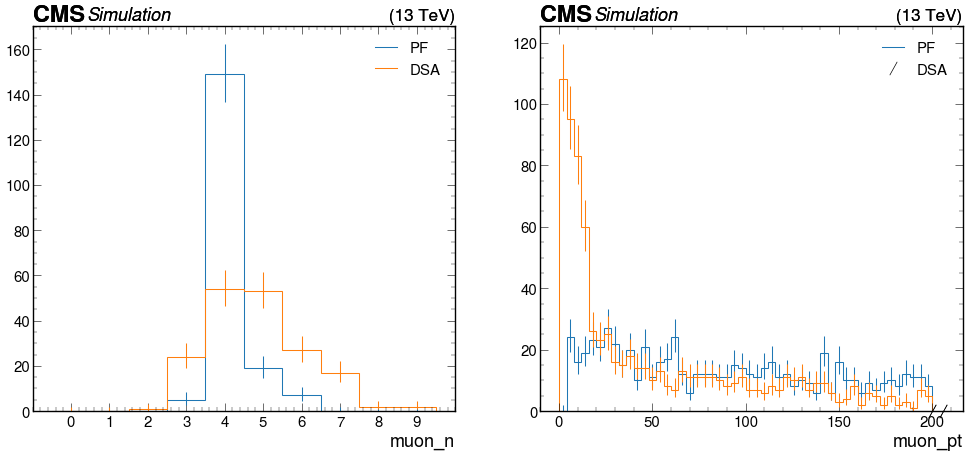

In [8]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["muon_n"]["llpnano", :])
utilities.plot(hists["dsaMuon_n"]["llpnano", :])
plt.legend(["PF", "DSA"])
plt.subplot(1, 2, 2)
utilities.plot(hists["muon_pt"]["llpnano", ::2j])
utilities.plot(hists["dsaMuon_pt"]["llpnano", ::2j])
plt.legend(["PF", "DSA"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f050a5810a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

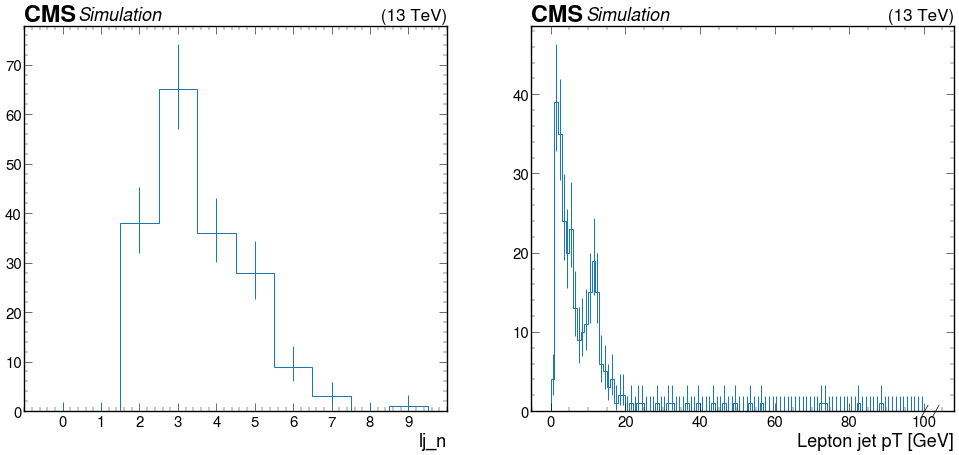

In [9]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["lj_n"]["llpnano", :])
plt.subplot(1, 2, 2)
utilities.plot(hists["lj_pt"]["llpnano", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f050a7a5130>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

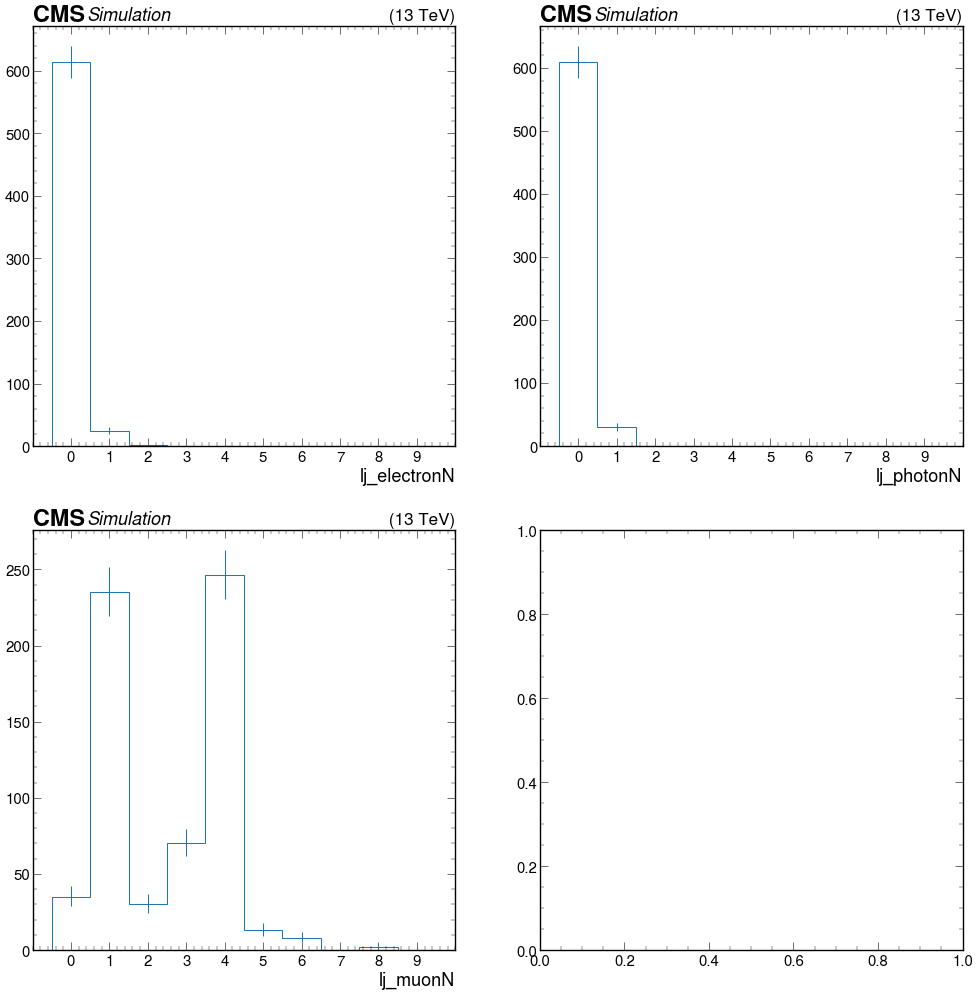

In [10]:
plt.subplots(2, 2, figsize=(24, 24))
plt.subplot(2, 2, 1)
utilities.plot(hists["lj_electronN"]["llpnano", :])
plt.subplot(2, 2, 2)
utilities.plot(hists["lj_photonN"]["llpnano", :])
plt.subplot(2, 2, 3)
utilities.plot(hists["lj_muonN"]["llpnano", :])
#plt.subplot(2, 2, 4)
#utilities.plot(hists["lj_dsaMuonN"]["llpnano", :])